## Spectral Clustering and Semi-Supervised Learning

#### This notebook contains different values and imports that can be used in this practical session.
#### Please keep the same variable names when provided in your report to make the work of teaching assistants easier. 
#### You can still change the values given or the sizes of the datasets treated if you believe it is usefull to illustrate your point.

#### You can directly edit the markdown boxes to add your comments and answers to the questions

In [71]:
# Question 1 (imports and advised values):
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

n_samples = 200 # You can change these values
noise_level_list = [.05,.1,.2] # You can change these values

### Question 1 : Complete the code in the box below

In [72]:
# import data, first use the noise = 0.05
import sklearn.datasets as datasets
# number of different noise levels
N = len(noise_level_list)
# list to store different data sets
lis_noisy_moons = []
for noise in noise_level_list:
    lis_noisy_moons.append(datasets.make_moons(n_samples=n_samples, noise=noise))

In [73]:
# check
noisy_moons = lis_noisy_moons[0]
type(noisy_moons), len(noisy_moons), noisy_moons[0].shape,  noisy_moons[1].shape

(tuple, 2, (200, 2), (200,))

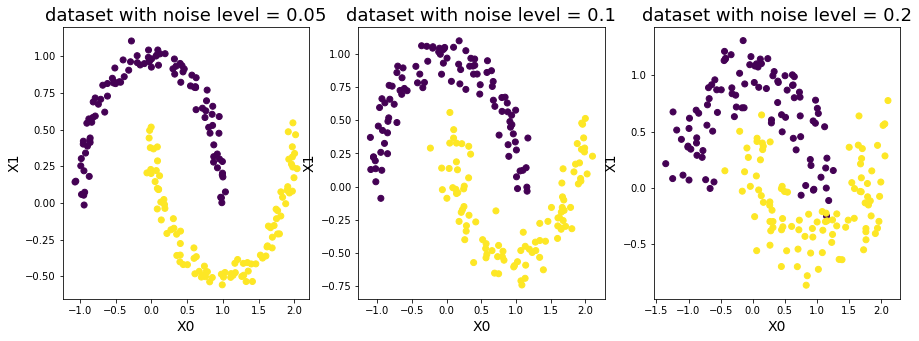

In [74]:
# plot 
plt.figure(figsize=(15, 5))

for i in range(1, N+1):
    # take data out
    noisy_moons = lis_noisy_moons[i-1]
    X, y_true = noisy_moons[0], noisy_moons[1]
    
    plt.subplot(1, N, i)

    plt.scatter(x=X[:,0], y=X[:,1], c=y_true)
    plt.title("dataset with noise level = " + str(noise_level_list[i-1]), fontsize=18)
    plt.xlabel("X0", fontsize=14)
    plt.ylabel("X1", fontsize=14)

In [75]:
# to get the largest adjacent matrix
adj_mat = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        adj_mat[i, j] = 1 if y_true[i] == y_true[j] else 0
adj_mat

array([[ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  1.,  1.],
       [ 0.,  1.,  1., ...,  0.,  1.,  1.],
       ..., 
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  1.,  1.],
       [ 0.,  1.,  1., ...,  0.,  1.,  1.]])

In [76]:
# Question 2 :
# from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
n_neighbors_list = [1,5,10] # You can change these values

### Question 2 : Complete the code in the box below

# KNN : try a cluster n_neighbors = 2

In [77]:
def draw_adj_mat(adj_mat, data):
    row, col = adj_mat.shape
    for i in range(row):
        for j in range(col):
            if adj_mat[i,j] == 1 :
                plt.plot([data[i][0], data[j][0]], [data[i][1], data[j][1]], 'r')

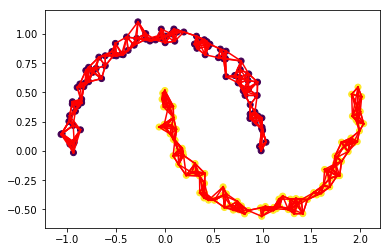

In [78]:
k = 6
moons = lis_noisy_moons[0]
X, y_true = moons[0], moons[1]
knn_adj_mat = kneighbors_graph(X, n_neighbors=k, n_jobs=4)

plt.subplot(1, 1, 1)
plt.scatter(x=X[:,0], y=X[:,1], c=y_true)
draw_adj_mat(knn_adj_mat, X)

# KNN try all 

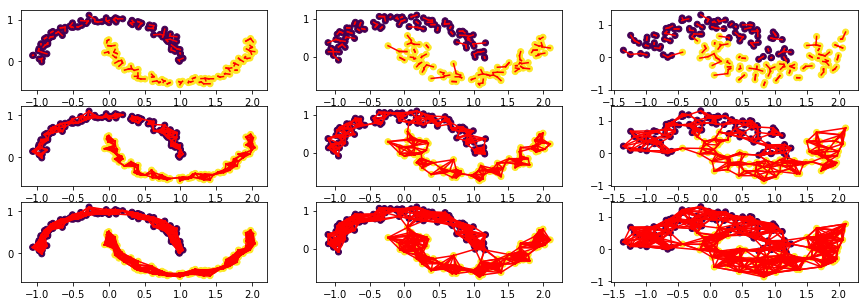

In [79]:
lis_knn = n_neighbors_list
K = len(lis_knn)

# plot 
plt.figure(figsize=(15, 5))
knn_nearests = []
# k :different values of neighbors
# j : different noise levels
for k in range(K):
    levelset = []
    for j in range(1, N+1):
        moons = lis_noisy_moons[j-1]
        X = moons[0]
        y_true = moons[1]
        plt.subplot(K, N, k*N+j)
        plt.scatter(x=X[:,0], y=X[:,1], c=y_true)
        knn_adj_mat = kneighbors_graph(X, n_neighbors=lis_knn[k],n_jobs=4) # default mode = 'connectivity', metric='minkowski'
        levelset.append(knn_adj_mat)
        draw_adj_mat(knn_adj_mat, X)
        
    knn_nearests.append(levelset.copy())
    levelset = []

In [80]:
kneighbors_graph?

## check

In [81]:
print(np.sum(knn_nearests[-1][-1].A, axis=1))

[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  

In [82]:
# use SparseMatrix.A to transform to Array, and .M to transform to Matrix
knn_adj_mat.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [83]:
# example for getting a real adjacent matrix
A = knn_adj_mat.A
l = ((A.T + A) > 0)
l * np.ones_like(A)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Question 3 : Optimization problem 

-

-

-

### Question 4 : Complete the code in the box below

## Normalized-Cut Spectral Clustering

In [84]:
from sklearn.cluster import spectral_clustering

# this methods solve for a connected graph, and normalized for k == 2

/anaconda/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


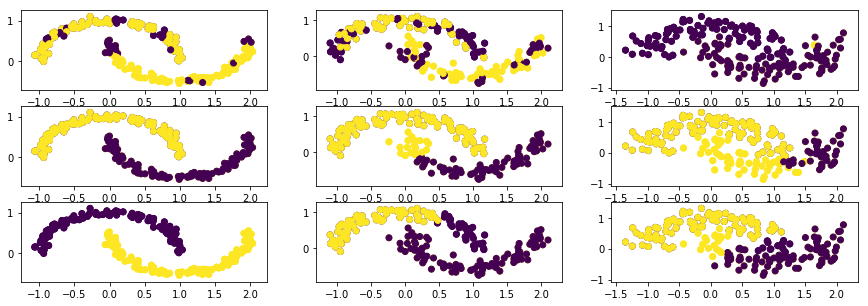

In [85]:
def transform2adj(sparsemat):
    A = sparsemat.A
    l = ((A.T + A) > 0)
    return l*np.ones_like(A)

# plot 
plt.figure(figsize=(15, 5))
labellist = []
# k :different values of neighbors
# j : different noise levels
for k in range(K):
    levellist = []
    for j in range(1, N+1):
        moons = lis_noisy_moons[j-1]
        X = moons[0]
        y_true = moons[1]
        plt.subplot(K, N, k*N+j)
        plt.scatter(x=X[:,0], y=X[:,1], c=y_true)
        # transform the sparse matrix to adjacent ones
        adj_mat_sym = transform2adj(knn_nearests[k][j-1])
        # get the labels
        labels = spectral_clustering(adj_mat_sym, n_clusters=2)
        levellist.append(labels.copy())
        #print(labels)

        # draw the graph
        plt.scatter(x=X[:,0], y=X[:,1], c=labels)
    labellist.append(levellist.copy())

### answer: 
#### we saw from the graph, increasing the k, at the same level of noise, nodes within the same cluster turned to be close and less error was made. Yet the nodes at the true border tends to be more possibly misclassified.

### Question 5 : Complete the code in the box below

### define the similarity of two clusters

#### the similarity matrix of cluster1 Tsub and cluster2 Tcomplete is defined as S(Tsub,Tcomplete) = < Tsub, Tcomplete > / norm(Tsub) * norm(Tcomplete), calcultated on the subset of Tsub. (where we take the Tsub to represent the bootstrap set. )

In [103]:
# get the bootstrap set (randomly choose 80% samples)
import random
import math

def sampling_boot(dataset, prop=0.8):
    sample_num = dataset.shape[0]
    idx_lis = np.arange(sample_num)

    # get the boot idx
    random.shuffle(idx_lis)
    bootstrap_idx = np.sort(idx_lis[0:math.floor(sample_num*prop)])
    
    return bootstrap_idx

moons = lis_noisy_moons[-1]
print(type(moons))
bootstrap_idx = sampling_boot(moons[0])
len(bootstrap_idx), bootstrap_idx

<class 'tuple'>


(160, array([  1,   2,   3,   4,   5,   7,   9,  10,  12,  14,  15,  17,  18,
         19,  20,  21,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
         36,  37,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  59,  60,  61,  62,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  83,  84,  85,  87,  88,  89,  90,  93,  94,  96,
         97,  98, 100, 101, 102, 105, 108, 109, 110, 111, 112, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 130,
        131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 144, 145, 146,
        147, 148, 151, 152, 153, 154, 155, 156, 159, 160, 161, 162, 164,
        165, 166, 167, 168, 169, 170, 172, 173, 175, 176, 178, 179, 180,
        181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194,
        195, 196, 197, 199]))

In [104]:
# from labels we generate the C(i,j) matrix .
# C(i,j) = 1 if i and j is in the same cluster
# C(i, j) = 0 if else
def cluster_mat(labels):
    length = len(labels)
    mat = np.zeros((length, length))
    for i in range(length):
        for j in range(length):
            if labels[i] == labels[j] and i != j:
                mat[i, j] = 1
    return mat

# test
l = np.array([1,2,3,1,2,3,0])
l2 = np.array([1]*7)
mat = cluster_mat(l)
mat2 = cluster_mat(l2)

print(mat, mat2)
print(np.sum(mat*mat2))


[[ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]] [[ 0.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  1.  1.]
 [ 1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  1.  0.  1.]
 [ 1.  1.  1.  1.  1.  1.  0.]]
6.0


In [105]:

# define the similarity 
def similarity(lab_boot, lab_all, boot_idx):
    n_sub = len(boot_idx)
    
    if n_sub != len(lab_boot):
        raise Exception("the bootstrap index dimension doesn't correspond to the labels of boot")
    
    # get the correspond bootstrap labels
    lab_sub = lab_all[boot_idx]
    # generate the matrix of sub index and boot index
    sub_mat = cluster_mat(lab_sub)
    boot_mat = cluster_mat(lab_boot)
    # calculate the simularity
    sim = np.sum(sub_mat * boot_mat) / np.sqrt(np.sum(np.square(sub_mat)) * np.sum(np.square(boot_mat)))
    
    return sim

# test
l = np.array([1,2,3,1,2,3,0])
l2 = np.array([1]*10)
similarity(l, l2, np.arange(0,7))


0.3779644730092272

<class 'scipy.sparse.csr.csr_matrix'>


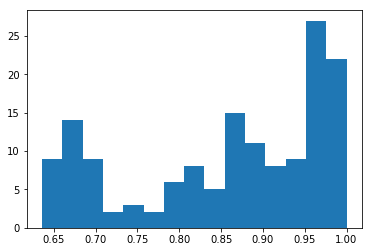

In [106]:
# calculate the clusters' similarity by running B times, 
# on the dataset of sparse matrix 
# generated by Knn, clustered in C clusters
import scipy

def cluster_method_similarity(cluster_func, dataset, B, C):
    
    # transform the sparse matrix to adjacent ones
    adj_mat_sym = transform2adj(dataset)
    # run the cluster_func on the complete dataset for one time
    labels = cluster_func(adj_mat_sym, n_clusters=C)
    
    # run B times the clustering function and get the labels for
    # the boot set
    similarity_lis = []
    labels_boot_lis = []
    for b in range(B):
        # sampling
        boot_idx = sampling_boot(dataset)
        
        adj_mat_sym_boot = adj_mat_sym[boot_idx,:][ :, boot_idx]
        # get the labels list
        labels_boot = cluster_func(adj_mat_sym_boot, n_clusters=C)
        labels_boot_lis.append(labels_boot)
        # compare the boots labels with the complete samples' labels
        sim = similarity(boot_idx=boot_idx, lab_all=labels, lab_boot=labels_boot)
        similarity_lis.append(sim)
    
    return similarity_lis



# test
dataset = knn_nearests[-1][-1]
print(type(dataset))
cluster_func = spectral_clustering
B = 150
C = 2
sims = cluster_method_similarity(cluster_func, dataset, B, C)

n, bins, patches = plt.hist(sims, bins=15)
plt.show()

#### we can conclude that the spectral algorithm is stable, since the distribution of similarity does concentrate at the maximum value of similarity. according to [1] ### detecting stable clusters using PCA

### Question 6 : Complete the code in the box below

In [90]:
# given k = 5, we list different noise level

cluster_func = spectral_clustering
B = 100
C = 2

plt.figure(figsize=(15, 5))

for k, dataset_lis in enumerate(knn_nearests):
    for idx, dataset in enumerate(dataset_lis):
        sims = cluster_method_similarity(cluster_func, dataset, B, C)
        plt.subplot(K, N,idx+1+k*N)
        n, bins, patches = plt.hist(sims)


/anaconda/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


IndexError: index 0 is out of bounds for axis 0 with size 0

### In the above graph, the first row lists the graph of k=2, the second row k=5, and the third k=10, from the left to the right, the noise level increase

### we saw that at different noise levels, the most stable k is different : at the lowest noise level, choose k = 10 gets the most stable result, at the highest level, choose k = 5 gets the most stable result.

### Question 7 : Complete the code in the box below

#### Hierarchical Clustering

In [109]:
from sklearn.cluster import AgglomerativeClustering

In [110]:
AgglomerativeClustering??

'''
- ward minimizes the variance of the clusters being merged.
- average uses the average of the distances of each observation of
  the two sets.
- complete or maximum linkage uses the maximum distances between
  all observations of the two sets.
'''

'\n- ward minimizes the variance of the clusters being merged.\n- average uses the average of the distances of each observation of\n  the two sets.\n- complete or maximum linkage uses the maximum distances between\n  all observations of the two sets.\n'

In [112]:
X = moons[0]
ward = AgglomerativeClustering(n_clusters=2, linkage='average').fit(X)
label = ward.labels_
label

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0])

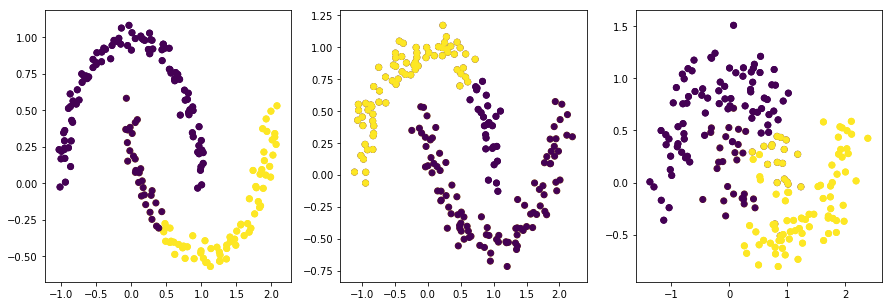

In [152]:
# HCA plot : 
def plot_HAC(method='ward', n_clusters=2):
    plt.figure(figsize=(15, 5))
    labellist = []
    # k :different values of neighbors
    # j : different noise levels
    for j in range(1, N+1):
        moons = lis_noisy_moons[j-1]
        X = moons[0]
        y_true = moons[1]
        plt.subplot(1, N, j)
        plt.scatter(x=X[:,0], y=X[:,1], c=y_true)
        # get the labels
        labels = AgglomerativeClustering(n_clusters=n_clusters, linkage=method).fit(X).labels_

        # draw the graph
        plt.scatter(x=X[:,0], y=X[:,1], c=labels)
        
plot_HAC()

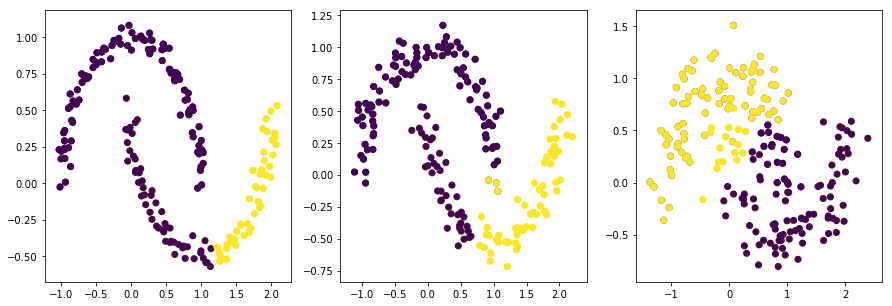

In [153]:
plot_HAC("average")

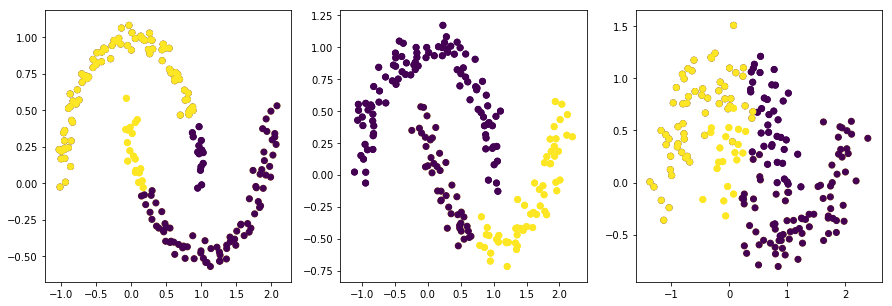

In [154]:
plot_HAC("complete")

#### Hierarchical Clustering stability

In [113]:
import scipy

0.586968871944
0.598496651379
0.666761592955


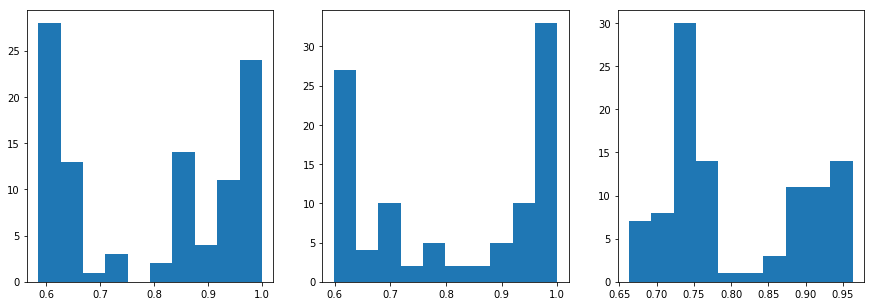

In [115]:
def HAC_method_similarity(linkage_method, dataset, B, C):

    # run the cluster_func on the complete dataset for one time
    labels = AgglomerativeClustering(linkage=linkage_method, n_clusters=C).fit(dataset).labels_
    
    # run B times the clustering function and get the labels for
    # the boot set
    similarity_lis = []
    labels_boot_lis = []
    for b in range(B):
        # sampling
        boot_idx = sampling_boot(dataset)
        # get the labels list
        labels_boot = AgglomerativeClustering(linkage=linkage_method, n_clusters=C).fit(dataset[boot_idx,:]).labels_
        labels_boot_lis.append(labels_boot)
        # compare the boots labels with the complete samples' labels
        sim = similarity(boot_idx=boot_idx, lab_all=np.array(labels), lab_boot=np.array(labels_boot))
        similarity_lis.append(sim)
    
    return similarity_lis

B = 100
C = 2

plt.figure(figsize=(15, 5))

for i in range(1, N+1):
    # take data out
    noisy_moons = lis_noisy_moons[i-1]
    X, y_true = noisy_moons[0], noisy_moons[1]
    sims = HAC_method_similarity("ward", X, B, C)
    print(np.percentile(sims, 0.8))
    plt.subplot(1, N, i)
    n, bins, patches = plt.hist(sims)

### which doesn't show a strong stability, as shown by the graph and the percentile 

### Experiment on MNIST

### Get data

In [156]:
# Add your code here
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

### check if well downloaded

In [161]:
%ls ~/scikit_learn_data/mldata/

mnist-original.mat


In [164]:
mnist, mnist.data.shape, mnist.target.shape, mnist.data[0]

({'COL_NAMES': ['label', 'data'],
  'DESCR': 'mldata.org dataset: mnist-original',
  'data': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])},
 (70000, 784),
 (70000,),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        

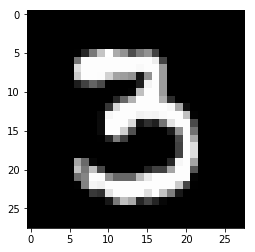

(24517, 3.0)

In [198]:
# an example of mnist

oid = random.randint(0, 69999)

first_image = np.array(mnist.data[oid], dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
oid, mnist.target[oid]

In [209]:
import time

In [237]:
# check spectral clustering and compare it with eigengap algo.
# knn, try 500 samples, k=6
k = 3
idx_sampling = sampling_boot(dataset=[mnist.data, mnist.target], prop=0.01)
X, y_true = mnist.data[idx_sampling], mnist.target[idx_sampling]
ts = time.time()
knn_adj_mat = kneighbors_graph(X, n_neighbors=k, n_jobs=6)
time.time() - ts

0.5108489990234375

In [238]:
# transform
adj_mat_mnist = transform2adj(knn_adj_mat)
ts = time.time()
# get labels
labels = spectral_clustering(adj_mat_mnist, n_clusters=10)
time.time() - ts

39.56949496269226

In [240]:
similarity(boot_idx=np.arange(len(y_true)),lab_all=y_true, lab_boot=labels)

0.4087817466487369

#### we saw that spectral_clustering for a 500 * 500 dimension matrix used 30s, which is intolerant !

### If we implement some preprocessing methods like the PCA ?

In [290]:
idx_sampling = sampling_boot(dataset=[mnist.data, mnist.target], prop=0.1)
X, y_true = mnist.data[idx_sampling], mnist.target[idx_sampling]

from sklearn import preprocessing
X = preprocessing.scale(X)


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [291]:
y_true, len(y_true)

(array([ 0.,  0.,  0., ...,  9.,  9.,  9.]), 7000)

In [292]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [293]:
X_reduc = pca.fit_transform(X)
X_reduc.shape

(7000, 4)

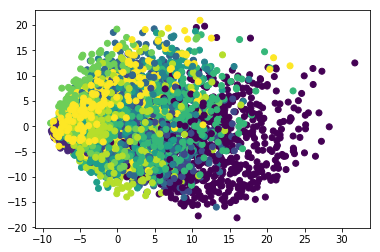

In [294]:
plt.scatter(X_reduc[:, 0], X_reduc[:, 1], c=y_true)

In [295]:
kneighbors_graph??

In [296]:
k = 5
ts = time.time()
knn_adj_mat = kneighbors_graph(X_reduc, n_neighbors=k, mode="connectivity", n_jobs=6)
# transform
adj_mat_mnist = transform2adj(knn_adj_mat)
time.time() - ts

2.929064989089966

In [297]:
ts = time.time()
# get labels
labels = spectral_clustering(adj_mat_mnist, n_clusters=10)
time.time() - ts

22.882317066192627

In [298]:
similarity(boot_idx=np.arange(len(y_true)),lab_all=y_true, lab_boot=labels)

0.32282784543903653

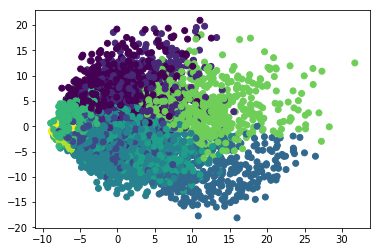

In [299]:
plt.scatter(X_reduc[:, 0], X_reduc[:, 1], c=labels)

In [288]:
spectral_clustering??

In [289]:
# do a cycle to find the best k
for k in range(2, 10):
    ts = time.time()
    knn_adj_mat = kneighbors_graph(X_reduc, n_neighbors=k, mode="connectivity", n_jobs=6)
    # transform
    adj_mat_mnist = transform2adj(knn_adj_mat)
    print("create adjacent matrix using:",time.time() - ts, "seconds")
    
    ts = time.time()
    # get labels
    labels = spectral_clustering(adj_mat_mnist, n_clusters=10)
    print("doing spectral clustering using:", time.time() - ts, "seconds")
    
    sim = similarity(boot_idx=np.arange(len(y_true)),lab_all=y_true, lab_boot=labels)
    print("k=", k, "similarity between the original labels and the predicted clustering is ", sim)
    

create adjacent matrix using: 4.510812282562256 seconds


/anaconda/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


doing spectral clustering using: 174.4871542453766 seconds
k= 2 similarity between the original labels and the predicted clustering is  0.378987176393
create adjacent matrix using: 2.3174471855163574 seconds
doing spectral clustering using: 27.91883611679077 seconds
k= 3 similarity between the original labels and the predicted clustering is  0.350457939524
create adjacent matrix using: 2.047168016433716 seconds
doing spectral clustering using: 21.687019109725952 seconds
k= 4 similarity between the original labels and the predicted clustering is  0.349857992604
create adjacent matrix using: 2.0435032844543457 seconds
doing spectral clustering using: 19.454580068588257 seconds
k= 5 similarity between the original labels and the predicted clustering is  0.33677534846
create adjacent matrix using: 2.8932390213012695 seconds
doing spectral clustering using: 23.379399061203003 seconds
k= 6 similarity between the original labels and the predicted clustering is  0.340056154767
create adjacent 

## Semi-Supervised Learning

Choice of the dataset used : **Precise** which dataset you chose and why it is relevant for the semi-supervised learning Task

Advised datasets :

*Breast Cancer Wisconsin (Diagnostic) Database*

*MNIST binary even vs odd (multiple clusters inside each class)*

Feel free to use other datasets if they are relevant

In [6]:
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.model_selection import train_test_split


### For all the next questions, use Cancer and Mnist classes to handle your data if you choose to use these one,
### You can also add more datasets but we advise you to handle them with this class for better readability
class semi_sup_dat:
    def __init__(self,data,p_unlabelled,name):
        # DON T CHANGE THE RANDOM STATES
        self.name = name
        if self.name == 'Mnist':
            # do an even vs odd binary classification :
            even = [0,2,4,6,8]
            Y = [int(y in even) for y in data.target]
        else:
            Y = data.target
        X_lab, X_unlab, y_lab, y_unlab = train_test_split(data.data, data.target, test_size=p_unlabelled, random_state=32)
        self.X_lab = X_lab
        self.X_unlab = X_unlab
        self.y_lab = y_lab
        self.y_unlab = y_unlab


# The following lines can be called later in the code to build a dataset with varying unlabelled proportion
p_unlabelled = 0.8 # You can change this value
Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')
digits = load_digits()

Mnist = semi_sup_dat(load_digits(), p_unlabelled,'Mnist')

In [7]:
Mnist.X_lab.shape, Mnist.X_unlab.shape, Mnist.y_lab.shape, Mnist.y_unlab.shape, digits.data.shape

((359, 64), (1438, 64), (359,), (1438,), (1797, 64))

### Question 9 : Complete the code in the box below

#### implement the KNN with the moon dataset

In [8]:
#  Question 9  : Complete the function self_training
from sklearn.neighbors import KNeighborsClassifier

# step 1 fit the labeled data 
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(moons[0][0:20], moons[1][0:20])
moons[0].shape

NameError: name 'moons' is not defined

In [9]:
# step 2 get the prediction for X_unlabel and the prob for each unlabeled prediction
prediction = neigh.predict(moons[0][20:])
prediction_prob = neigh.predict_proba(moons[0][20:])

NameError: name 'moons' is not defined

In [388]:
prediction.shape, prediction_prob.shape, np.max(prediction_prob, axis=1).shape

((180,), (180, 2), (180,))

(array([  27.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  153.]),
 array([ 0.66666667,  0.7       ,  0.73333333,  0.76666667,  0.8       ,
         0.83333333,  0.86666667,  0.9       ,  0.93333333,  0.96666667,  1.        ]),
 <a list of 10 Patch objects>)

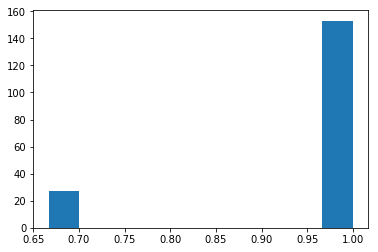

In [389]:
plt.hist(np.max(prediction_prob, axis=1))

In [390]:
# get a 95 percentile for the prediction probability
p = np.percentile(np.max(prediction_prob, axis=1), 95) 
p

1.0

In [392]:
# step 3 find the confident unlabeled samples and add to labeled ones
conf_idx = np.max(prediction_prob, axis=1) >= p
len(conf_idx)

old_samples = moons[0][0:20]
conf_samples = moons[0][20:][conf_idx]
conf_samples.shape, old_samples.shape
new_samples = np.vstack((old_samples, conf_samples))
new_y = np.concatenate([moons[1][0:20], prediction[conf_idx]])
left_unlabels = moons[0][20:][~conf_idx]
len(left_unlabels) + len(new_samples)

200

In [404]:
l = np.array([2,3,4]) > 3
print(l)
print(sum(~l))
sum(~(np.array([2,3,4]) > 3))

[False False  True]
2


2

#### Define the function and try with the data of Mnist

In [178]:
def split_unlabel_set(p_test, x, y):
    X_lab, X_test, y_lab, y_test = train_test_split(x, y, test_size=p_test, random_state=32)
    return X_lab, X_test, y_lab, y_test

def self_training(X_lab_orig, y_lab_orig, X_unlab_orig, X_test, y_test, n_neighbors=3, percent=0.95, delta=1000, tol=1e-4, maxstep=100):
    # do the copy
    X_lab = X_lab_orig.copy()
    X_unlab = X_unlab_orig.copy()
    y_lab = y_lab_orig.copy()
    sim, k = delta, 0
    # step 1 fit the labeled data 
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(X_lab, y_lab)
    
    while k < maxstep and X_unlab.shape[0] > 0:
        prediction_test = neigh.predict(X_test)

        # step 2 get the prediction for X_unlabel and the prob for each unlabeled prediction
        prediction = neigh.predict(X_unlab)
        prediction_prob = neigh.predict_proba(X_unlab)
        # get the p_percentile
        #p = np.percentile(np.max(prediction_prob, axis=1), percent)
        # step 3 find the confident unlabeled samples and add to labeled ones
        conf_idx = np.max(prediction_prob, axis=1) >= percent
        #plt.hist(np.max(prediction_prob, axis=1))
        
        # step 4 update the labeled data and unlabeled data
        new_labeled = np.vstack((X_lab, X_unlab[conf_idx]))
        new_y = np.concatenate([y_lab, prediction[conf_idx]])
        new_unlabeled = X_unlab[~conf_idx]
        #print(new_unlabeled.shape[0])
        
        X_lab, X_unlab, y_lab = new_labeled, new_unlabeled, new_y
        
        # step 5 use the neigh algo on the updated dataset and calculate the similarity
        neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
        neigh.fit(X_lab, y_lab)
        
        prediction_new_test = neigh.predict(X_test)
        
        sim = similarity(boot_idx=np.arange(len(y_test)), lab_all=prediction_new_test, lab_boot=prediction_test)
        print("k = ", k, ", updated classifier on the validation set, sim = ", sim, ", X_unlab samples =", X_unlab.shape[0] )
        
        # step 6 update neigh classifer and k 
        k += 1
        
        if 1-sim < tol :
            break
        
    return neigh, sim

p_test = 0.5
p_unlabelled = 0.7
Mnist = semi_sup_dat(load_digits(), p_unlabelled,'Mnist')

X_lab, X_test, y_lab, y_test = split_unlabel_set(p_test, Mnist.X_lab, Mnist.y_lab)
myneigh, sim = self_training(X_lab_orig=X_lab, y_lab_orig=y_lab, X_unlab_orig=Mnist.X_unlab, X_test=X_test, y_test=y_test)
print(sim)

k =  0 , updated classifier on the validation set, sim =  0.963224326958 , X_unlab samples = 164
k =  1 , updated classifier on the validation set, sim =  0.994154115389 , X_unlab samples = 51
k =  2 , updated classifier on the validation set, sim =  1.0 , X_unlab samples = 31
1.0


### test the model

In [418]:
pred = myneigh.predict(X_test)
similarity(boot_idx=np.arange(len(y_test)), lab_all=y_test, lab_boot=pred)

0.97104270259890502

prediction : 
 [3 1 2 0 7 8 5 9 0 2 1 8 4 0 0 7 7 1 1 0] 
real labels: 
 [3 1 2 0 7 8 5 9 0 2 1 8 4 0 0 7 7 1 1 0]


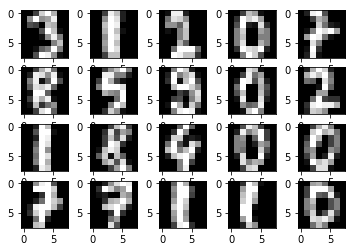

In [413]:
examples = 20
for i in range(examples):
    plt.subplot(4, 5, i+1)
    pixels = X_test[i].reshape((8, 8))
    plt.imshow(pixels, cmap='gray')
print("prediction : \n",myneigh.predict(X_test[0:examples]),"\nreal labels: \n", y_test[0:examples])

### Remark: For the Mnist set, we got a similarity > 0.92 on the test set, which is not bad.

In [419]:
p_test = 0.5
p_unlabelled = 0.8
Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')

X_lab, X_test, y_lab, y_test = split_unlabel_set(p_test, Cancer.X_lab, Cancer.y_lab)
myneigh, sim = self_training(X_lab_orig=X_lab, y_lab_orig=y_lab, X_unlab_orig=Cancer.X_unlab, X_test=X_test, y_test=y_test)
print(sim)

k =  0 , updated classifier on the test set, sim =  0.969132364304 , X_unlab samples = 69
k =  1 , updated classifier on the test set, sim =  1.0 , X_unlab samples = 23
1.0


### Remark: For the Cancer set, we got a similarity > 0.96, which is good.

#### we now turned to the hyperparametres

### Question 10 : Complete the code in the box below

###### Closed form expression :

-

-

-

## Implement the LapRLS

In [16]:
from sklearn.metrics.pairwise import rbf_kernel # Or reimplement it yourself if your prefer
from scipy.linalg import block_diag

In [17]:
def get_dataset(datasetsX, datasetsY, p_unlabel):
    X_lab, X_unlab, y_lab, y_unlab = split_unlabel_set(p_unlabel, datasetsX, datasetsY)
    
    return X_lab, X_unlab, y_lab, y_unlab

1.0 1.0


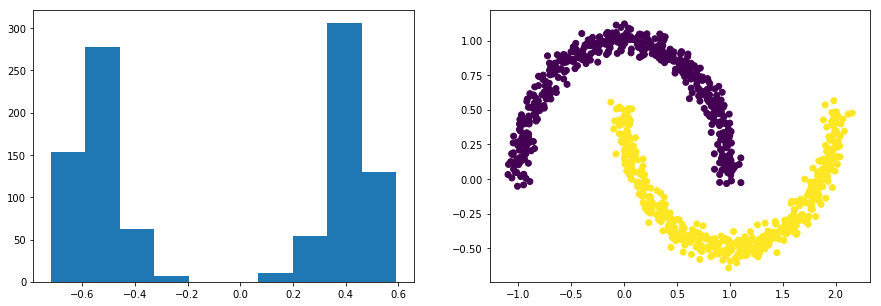

In [160]:


def LapRLS(X_lab_orig, X_unlab_orig, y_lab_orig, y_unlab_orig, lamb=1e-4, lamb_u=1e-2):
    # do the copy
    X_lab = X_lab_orig.copy()
    X_unlab = X_unlab_orig.copy()
    y_lab = y_lab_orig.copy()
    y_unlab = y_unlab_orig.copy()
    
    train_X = np.vstack((X_lab, X_unlab))
    train_y = np.concatenate([y_lab, len(y_unlab)*[0]])
    
    W = rbf_kernel(train_X)
    D = np.diag(np.sum(W, axis=1))
    L = D - W
    
    K = rbf_kernel(X=train_X)
    
    l, u = len(X_lab), len(X_unlab)
    #lamb = 5/(l+u)
    #lamb_u = 5/(l+u)
    J = np.diag([1]*l + [0]*u)
    I = np.diag([1]*(l+u))
    ones = np.ones((l+u, l+u))
    temp = J.dot(ones).dot(J)
    Y = train_y
    
    alpha = np.linalg.inv(J.dot(K) + lamb*l*I + lamb_u*l/(u + l)**2 * L.dot(K) - 1/l*temp.dot(K)).dot(I - 1/l*temp).dot(Y)
    f_output = K.dot(alpha)
    #b = 1/l*np.sum(-f_output[:l] + Y[:l])
    #f_output = f_output 
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.hist(f_output)
    #print(f_output[l:])
    
    f_output = f_output > 0
    
    plt.subplot(1,2,2)
    plt.scatter(x=train_X[:, 0], y=train_X[:, 1], c=f_output)
    
    
    accu_lab = 1 - sum(np.abs(f_output[:l] - Y[:l]))/len(f_output[:l])
    accu = 1 - sum(np.abs(f_output[l:] - y_unlab))/len(f_output[l:])
    print(accu, accu_lab)
    
    return f_output, accu, accu_lab, alpha, train_X

p_unlabel = 0.8
moons = make_moons(n_samples=1000, noise=0.05)
X_lab, X_unlab, y_lab, y_unlab = get_dataset(moons[0], moons[1], p_unlabel)
f_output, _, _, alpha, train_X = LapRLS(X_lab, X_unlab, y_lab, y_unlab)
#plt.scatter(x=train_X[:, 0], y=train_X[:, 1], c=f_output)

### the predict function

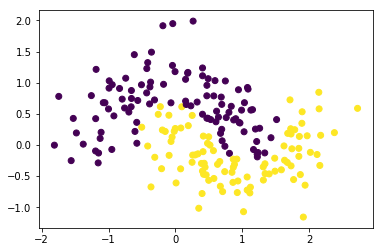

In [161]:
# write a function for predicting, using train set X and alpha returned above
def LapRLS_predict(train_X, new_X, alpha):
    K = rbf_kernel(X=train_X, Y=new_X)
    #print(K.shape, alpha.shape)
    predict = np.dot(K.T, alpha)
    #print(K.T, alpha.T, predict)
    lag = np.array(list(map(lambda x:-1 if x < 0 else 1, predict)))
    
    return lag

new_X, new_y = make_moons(n_samples=200,noise=0.3)
testlags = LapSVM_predict(train_X, new_X, alpha)
plt.scatter(x=new_X[:, 0], y=new_X[:, 1], c=testlags)


### fix $\lambda = 1e-5$, and try different values of $\lambda u$

1.0 1.0


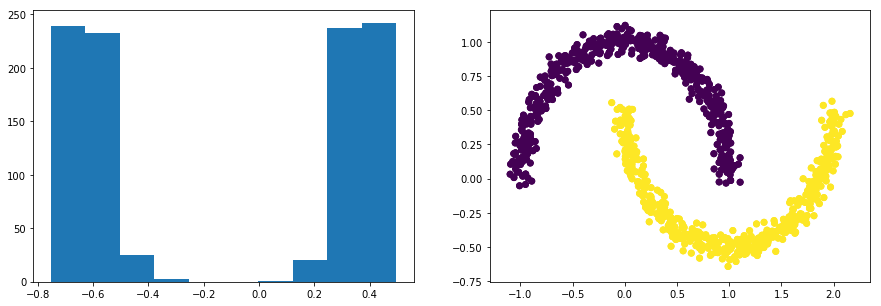

In [162]:
f_output = LapRLS(X_lab, X_unlab, y_lab, y_unlab, lamb=1e-5, lamb_u=1e-3)[0]
train_X = np.vstack((X_lab, X_unlab))
plt.scatter(x=train_X[:, 0], y=train_X[:, 1], c=f_output)

lambda_u =  1e-06
0.82875 0.85
lambda_u =  1e-05
0.82875 0.85
lambda_u =  0.0001
0.82875 0.85
lambda_u =  0.001
0.82875 0.85
lambda_u =  0.01
0.82875 0.85
lambda_u =  0.1
0.82875 0.85
lambda_u =  1.0
0.82875 0.85
lambda_u =  10.0
0.83875 0.855
lambda_u =  100.0
0.8675 0.885
lambda_u =  1000.0
0.92625 0.925
lambda_u =  10000.0
0.8725 0.92
lambda_u =  100000.0
0.50125 0.495
lambda_u =  1000000.0
0.50125 0.495


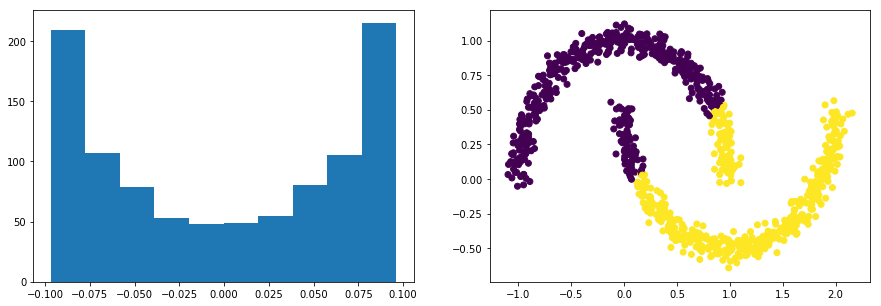

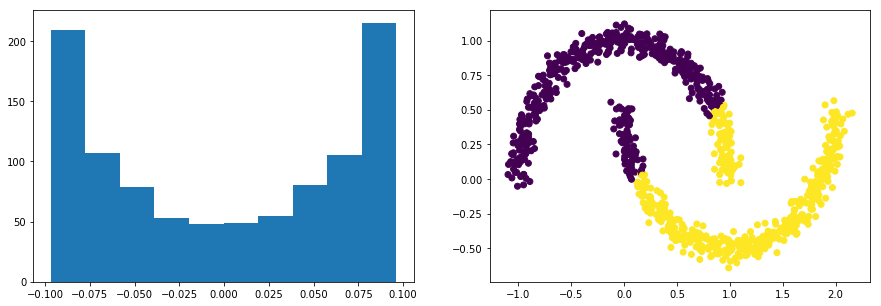

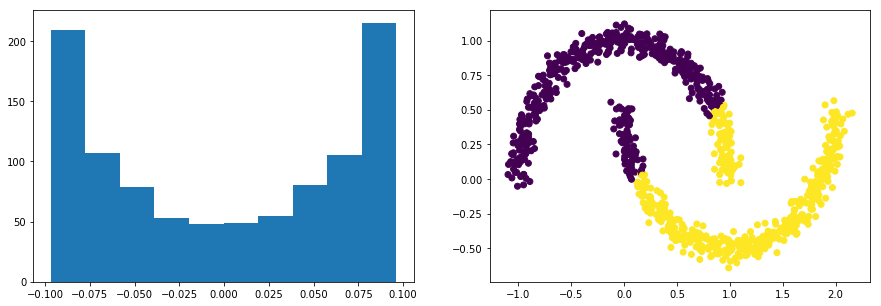

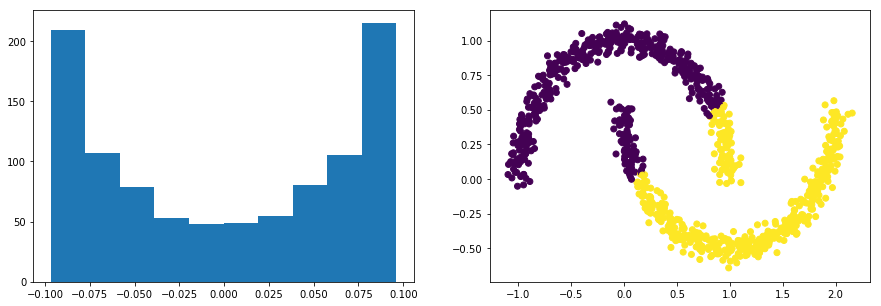

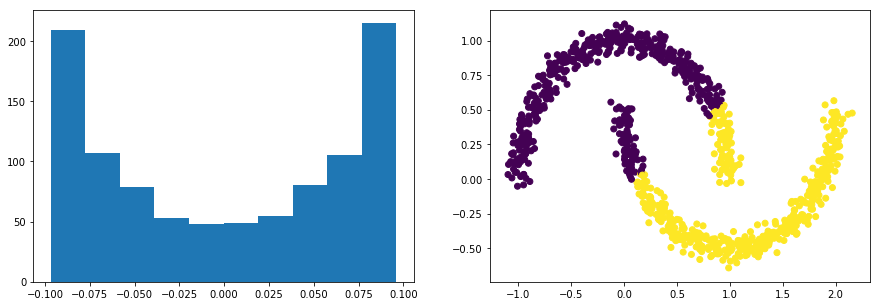

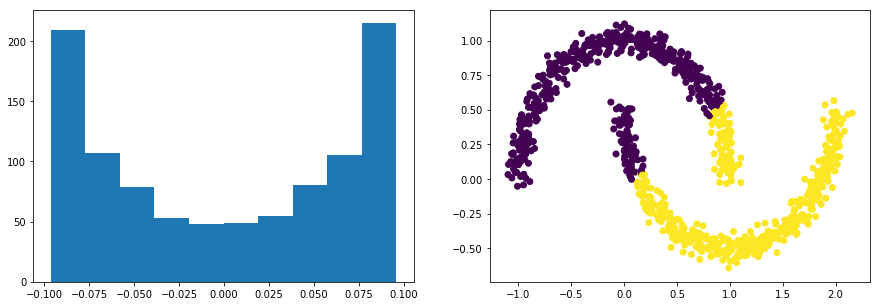

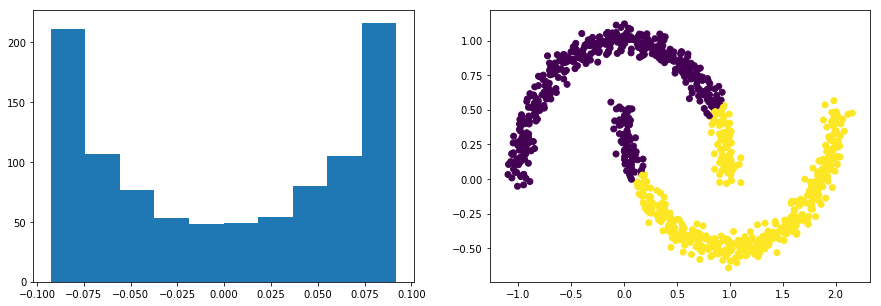

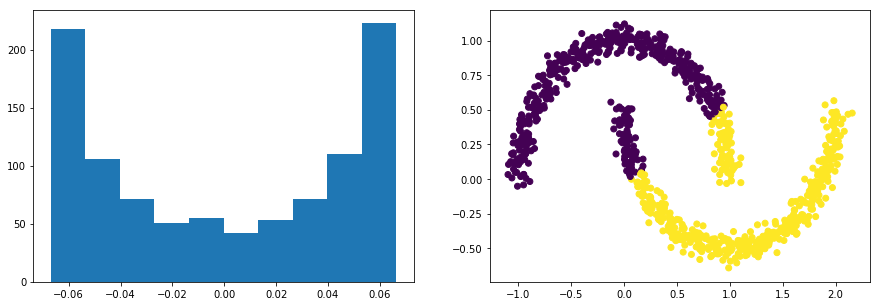

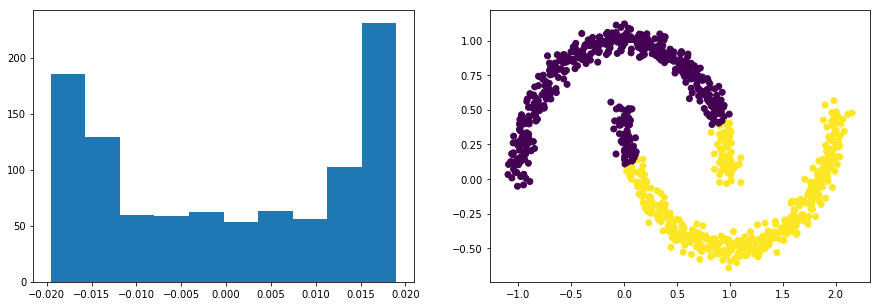

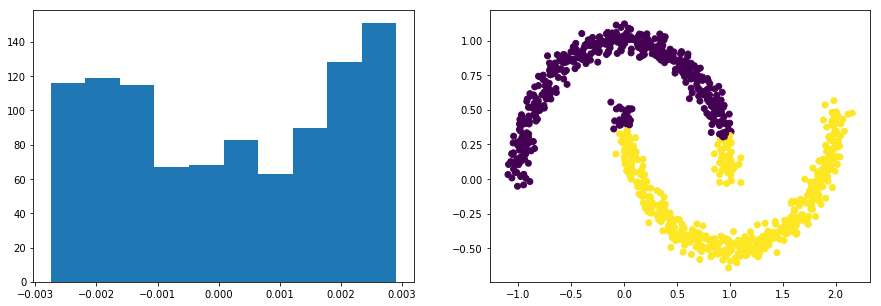

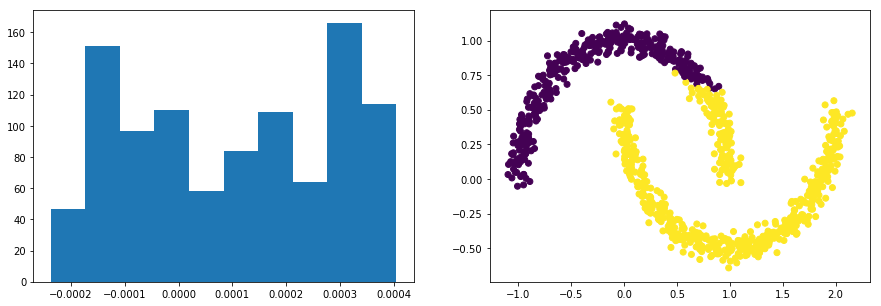

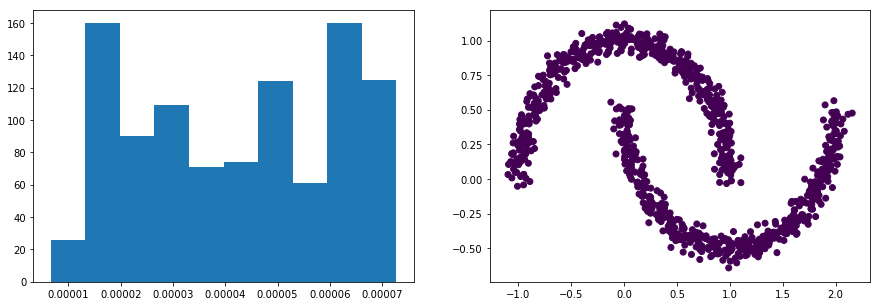

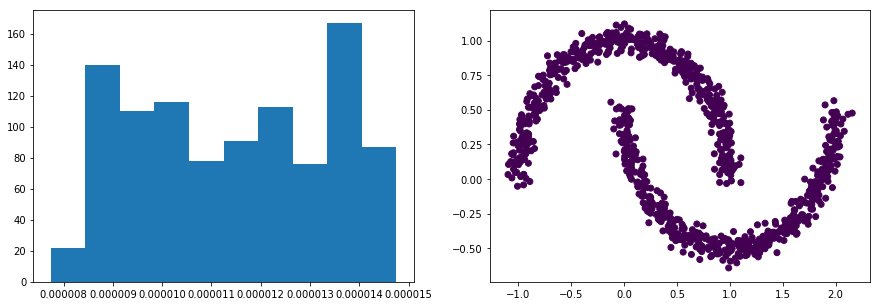

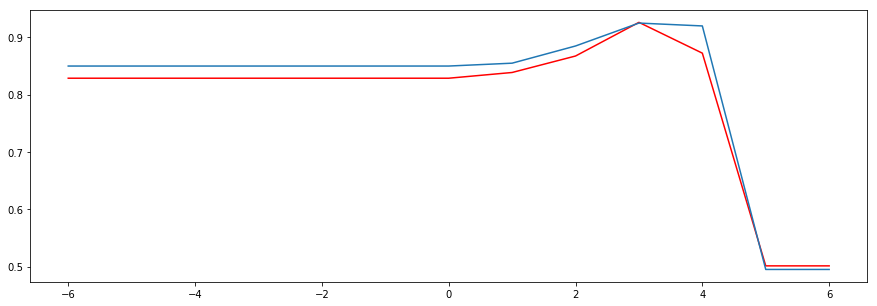

In [163]:
lamb = 1
lamb_u_lis = 10**np.arange(1, 14)*1e-7
acc_lis = []
acc_lab_lis = []
for lamb_u in lamb_u_lis:
    print("lambda_u = ", lamb_u)
    f_output, acc, acc_lab, alpha, train_X = LapRLS(X_lab, X_unlab, y_lab, y_unlab, lamb=lamb, lamb_u=lamb_u) 
    acc_lis.append(acc)
    acc_lab_lis.append(acc_lab)

plt.figure(figsize=(15, 5))
plt.plot(np.log10(lamb_u_lis), acc_lis, c='red')
plt.plot(np.log10(lamb_u_lis), acc_lab_lis)

0.926470588235 1.0


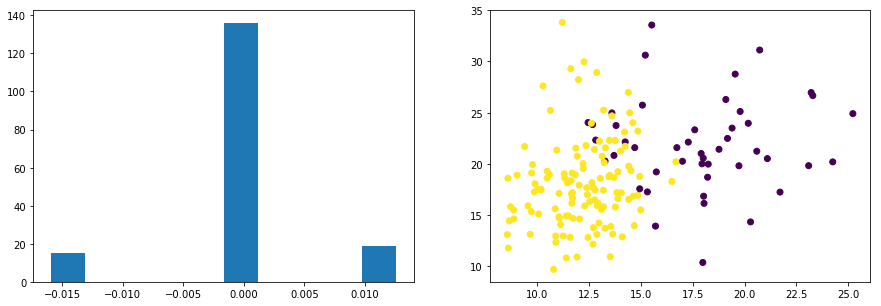

In [164]:
p_test = 0.8
#p_unlabelled = 0.8
Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')
X_lab, X_unlab, y_lab, y_unlab = split_unlabel_set(p_test, Cancer.X_lab, Cancer.y_lab)
f_output = LapRLS(X_lab, X_unlab, y_lab, y_unlab, lamb=1, lamb_u=1e-3) 
#plt.hist(f_output)
train_X = np.vstack((X_lab, X_unlab))
#plt.scatter(x=train_X[:, 0], y=train_X[:, 1], c=f_output[0])

### Question 11 : Complete the code in the box below

### Question 12 : Add your answer here

- we observed that when $\lambda$ is fixed at a proper level, the accuracy of labeled and unlabeled data can be both quite good.

- with a $\lambda u$ too small, the accuracy of labeled ones increase much faster than unlabeled ones. and when $\lambda u$ too large, the unlabeled ones' accuracy droppes much faster than labeled ones

- 

### Question 13 : Complete the code in the box below

- We say that a closed-form solution increase the cost of calculation of the algorithm (the multiplication and inversion of matrix ect.)

### Question 14 : Complete the code in the box below

##### Add your answer to the question here :

-

-

-

In [ ]:
# stochastic algorithm for LapRLS


### Question 15 : Complete the code in the box below

### QP SVM

In [23]:
# use a svc solver -- standard with different kernel matrix 
from sklearn.svm import SVC, LinearSVC
LinearSVC??

[LibSVM]shape beta =  (1, 34)
label set # =  (34,)
0.852941176471 1.0


array([ 1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,
        1, -1,  1,  1,  1])

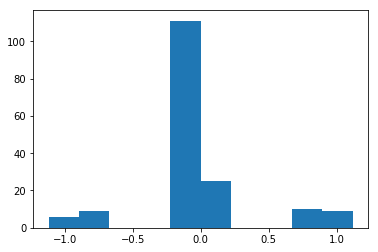

In [166]:
def LapSVM(X_lab_orig, X_unlab_orig, y_lab_orig, y_unlab_orig, lamb=1e-4, lamb_u=1e-2):
    # do the copy
    X_lab = X_lab_orig.copy()
    X_unlab = X_unlab_orig.copy()
    y_lab = y_lab_orig.copy()
    y_unlab = y_unlab_orig.copy()
    
    train_X = np.vstack((X_lab, X_unlab))
    train_y = np.concatenate([y_lab, len(y_unlab)*[0]])
    
    Y = np.diag(y_lab)
    l, u = len(X_lab), len(X_unlab)

    J = np.diag([1]*l + [0]*u)[:l, :]
    I = np.diag([1]*(l+u))
    
    W = rbf_kernel(train_X)
    D = np.diag(np.sum(W, axis=1))
    L = D - W

    K = rbf_kernel(X=train_X)

    def call_Q(train_X, train_y):

        #ones = np.ones((l+u, l+u))
        #temp = J.dot(ones).dot(J)
        #temp = Y.dot(J).dot(K)
        temp = J.dot(K)
        inv = np.linalg.inv(2*lamb*I + 2*lamb_u/(u + l)**2 * L.dot(K))
        
        return temp.dot(inv).dot(J.T)

    clf = SVC(C=1/l, kernel=call_Q, verbose=True)
    clf.fit(train_X, train_y)
    
    beta = np.abs(clf.dual_coef_) # which gives the solution for dual problem ?
    inv = np.linalg.inv(2*lamb*I + 2*lamb_u/(u + l)**2*L.dot(K))
    alpha = inv.dot(J.T).dot(Y)
    print("shape beta = ", beta.shape)
    print("label set # = ", y_lab.shape)

    complete = alpha.shape[1] - beta.shape[1]
    if complete > 0 :
        zeros = np.zeros((1,complete))
        beta_new = np.zeros((1,alpha.shape[1]))
        print("shape of beta is ", beta.shape[1] )
        print("add zeros for the incomplete features, # = ", complete)
        #print(zeros.shape)
        #print(beta.shape)
        j = 0
        for i in clf.support_:
            beta_new[0,i] = beta[0, j]
            j += 1
        beta = beta_new
        #beta = np.concatenate([beta.T, zeros.T]).T
    
    #print(beta, y_lab)
    alpha = alpha.dot(beta.T)
    
    f_output = K.dot(alpha)
    #print(K.shape, alpha.shape)
    plt.hist(f_output)
    
    f_output = np.array(list(map(lambda x: 1 if x > 0 else -1, f_output)))
    
    accu_lab = 1 - np.sum(np.abs(f_output[:l].T - y_lab))/len(f_output[:l])
    accu = 1 - np.sum(np.abs(f_output[l:].T - y_unlab))/len(f_output[l:])
    print(accu, accu_lab)
    
    return f_output, accu, accu_lab, clf, alpha, train_X

# test by cancer set, note to change the label of y from {0,1} to {-1, 1}
p_test = 0.8
Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')
Cancer.y_lab = np.array(list(map(lambda x:-1 if x == 0 else 1, Cancer.y_lab.copy())))
X_lab, X_unlab, y_lab, y_unlab = split_unlabel_set(p_test, Cancer.X_lab, Cancer.y_lab)
f_output, _, _, clf, alpha, train_X = LapSVM(X_lab, X_unlab, y_lab, y_unlab, lamb=0.01, lamb_u=1e-5) 


# write a function for predicting, using train set X and alpha returned above
def LapSVM_predict(train_X, new_X, alpha):
    K = rbf_kernel(X=train_X, Y=new_X)
    #print(K.shape, alpha.shape)
    predict = np.dot(K.T, alpha)
    #print(K.T, alpha.T, predict)
    lag = np.array(list(map(lambda x:-1 if x < 0 else 1, predict)))
    
    return lag

LapSVM_predict(train_X, train_X[0:90, :], alpha)

[LibSVM]shape beta =  (1, 7)
label set # =  (100,)
shape of beta is  7
add zeros for the incomplete features, # =  93
1.0 1.0


array([-1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
        1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,
        1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,
        1, -1,  1])

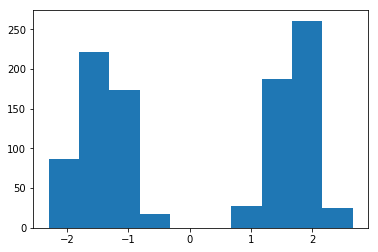

In [167]:
# the moons set , changed y label to 1 or -1
p_unlabel = 0.9
moons = make_moons(n_samples=1000, noise=0.05)
moons_y_lab = np.array(list(map(lambda x:-1 if x == 0 else 1, moons[1])))
X_lab, X_unlab, y_lab, y_unlab = get_dataset(moons[0], moons_y_lab, p_unlabel)

# check information from the dual solution.
f_output, _, _, clf, alpha, train_X = LapSVM(X_lab, X_unlab, y_lab, y_unlab, lamb=1e-5, lamb_u=1e-3)
clf.dual_coef_.conjugate(), clf.support_
# predict some new value, assuming this is new data
LapSVM_predict(train_X, train_X[-190:, :], alpha)

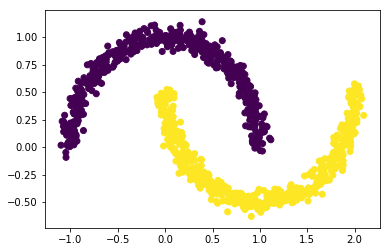

In [168]:
plt.scatter(x=train_X[:, 0], y=train_X[:, 1], c=f_output)

### Question 16 : Complete the code in the box below

###### Describe your protocol here : 
- when lamb is small, the labeled data is emphasized, when lamb_u is small, the structure information is emphasized.

-

-

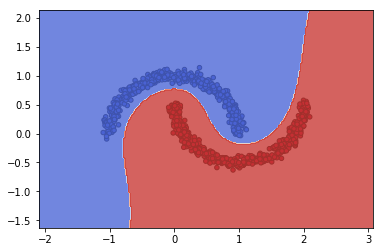

In [169]:
# use the standard plot method of sklearn

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, pred_func, xx, yy, alp, train_X, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = pred_func(train_X, np.c_[xx.ravel(), yy.ravel()], alp, **params)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    return out


# Set-up 2x2 grid for plotting.
fig, ax = plt.subplots(1, 1)
#plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = train_X[:, 0], train_X[:, 1]
xx, yy = make_meshgrid(X0, X1)
ax.scatter(X0, X1, c=f_output, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plot_contours(ax=ax, xx=xx, yy=yy, pred_func=LapSVM_predict, alp=alpha, train_X=train_X)

plt.show()

### Compare Different Algorithms on the Same data Set 

### train set

In [224]:
p_unlabel = 0.8
moons = make_moons(n_samples=1000, noise=0.2)
X_lab, X_unlab, y_lab, y_unlab = get_dataset(moons[0], moons[1], p_unlabel)

### train by different models

In [225]:
import time

0.9675 0.975
time used for training: 0.6654589176177979 seconds


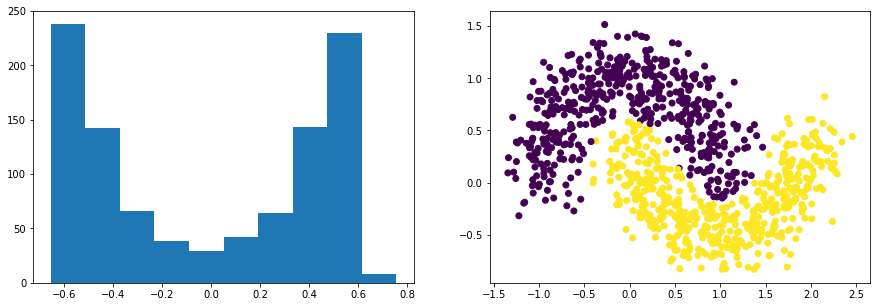

In [226]:
# LapRLS
time_start = time.time()
f_output_LapRLS, acc_LapRLS, acc_lab_LapRLS, alpha_LapRLS, train_X_LapRLS = LapRLS(X_lab, X_unlab, y_lab, y_unlab)
time_length = time.time() - time_start
print("time used for training:", time_length, "seconds")

In [227]:
#self training: X_val , y_val to decide when to stop
p_test = 0.6
X_lab, X_unlab, y_lab, y_unlab = get_dataset(moons[0], moons[1], p_unlabel)
X_lab_train, X_val, y_lab_train, y_val = split_unlabel_set(p_test, X_lab, y_lab)
time_start = time.time()
myneigh, acc = self_training(X_lab_orig=X_lab_train, y_lab_orig=y_lab_train, X_unlab_orig=X_unlab, X_test=X_val, y_test=y_val, tol=1e-4)
time_length = time.time() - time_start
print("time used for training:", time_length, "seconds")

k =  0 , updated classifier on the validation set, sim =  0.96675119752 , X_unlab samples = 102
k =  1 , updated classifier on the validation set, sim =  0.966828422247 , X_unlab samples = 28
k =  2 , updated classifier on the validation set, sim =  0.983336833922 , X_unlab samples = 18
k =  3 , updated classifier on the validation set, sim =  1.0 , X_unlab samples = 17
time used for training: 0.0752861499786377 seconds


0.9675 0.975
time used for training: 0.5157308578491211 seconds


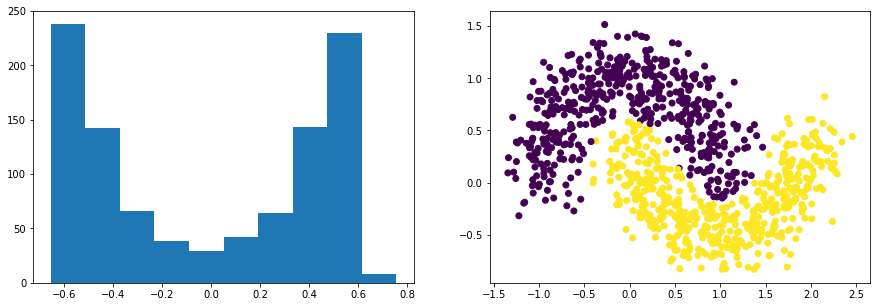

In [228]:
# LapSVM
time_start = time.time()
f_output_LapSVM, acc_LapSVM, acc_lab_LapSVM, alpha_LapSVM, train_X_LapSVM = LapRLS(X_lab, X_unlab, y_lab, y_unlab)
time_length = time.time() - time_start
print("time used for training:", time_length, "seconds")

### Remarks: During the training period, on the same training data set, the self-training method is much quicker than the closed-form-solved LapSVM, which is quicker than the closed-form-solved LapRLS. Note that we fixed the hyperparametres for both Laps at lamb=1e-4, lamb_u=1e-2, which may have an influence on the accuracy of the testing period.

### Test different models

In [239]:
# test set
moons_test_noise_levels = 10**np.arange(3)*0.002
moons_test_lis = []
for i in moons_test_noise_levels:
    moons_test = make_moons(n_samples=300, noise=i)
    moons_test_lis.append(moons_test)

In [ ]:
# LapSVM

fig, ax = plt.subplots(1,3, figsize=(15, 5))

for i,moons_test in enumerate(moons_test_lis):
    test_X, test_y = moons_test[0], moons_test[1]
    X0, X1 = test_X[:, 0], test_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    labels = LapSVM_predict(alpha=alpha_LapSVM, new_X=test_X, train_X=train_X_LapSVM)
    # map test labels to {-1, 1}
    test_y = np.array(list(map(lambda x:-1 if x==0 else 1, test_y)))
    print("accuracy =", np.mean(labels.T - test_y == 0))
    ax[i].scatter(X0, X1, c=test_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plot_contours(ax=ax[i], xx=xx, yy=yy, pred_func=LapSVM_predict, alp=alpha_LapSVM, train_X=train_X_LapSVM)

plt.show()

accuracy = 1.0
accuracy = 1.0
accuracy = 0.913333333333
accuracy = -0.273333333333


accuracy = 1.0
accuracy = 1.0
accuracy = 0.946666666667


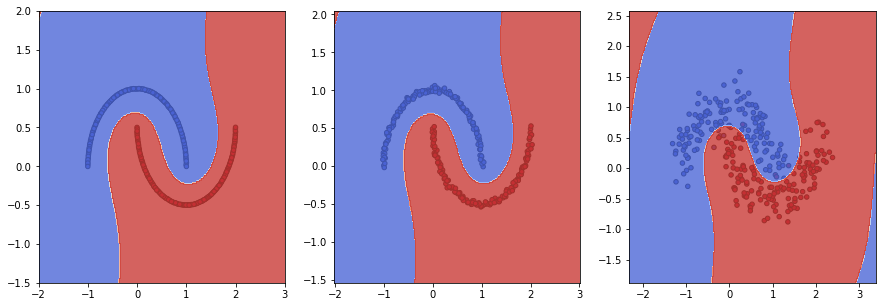

In [219]:
# LapRLS

fig, ax = plt.subplots(1,3, figsize=(15, 5))

for i,moons_test in enumerate(moons_test_lis):
    test_X, test_y = moons_test[0], moons_test[1]
    X0, X1 = test_X[:, 0], test_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    labels = LapRLS_predict(alpha=alpha_LapRLS, new_X=test_X, train_X=train_X_LapRLS)
    # map test labels to {-1, 1}
    test_y = np.array(list(map(lambda x:-1 if x==0 else 1, test_y)))
    print("accuracy =", np.mean(labels.T - test_y == 0))
    ax[i].scatter(X0, X1, c=test_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plot_contours(ax=ax[i], xx=xx, yy=yy, pred_func=LapRLS_predict, alp=alpha_LapRLS, train_X=train_X_LapRLS)

plt.show()

accuracy = 1.0
accuracy = 1.0
accuracy = 0.976666666667


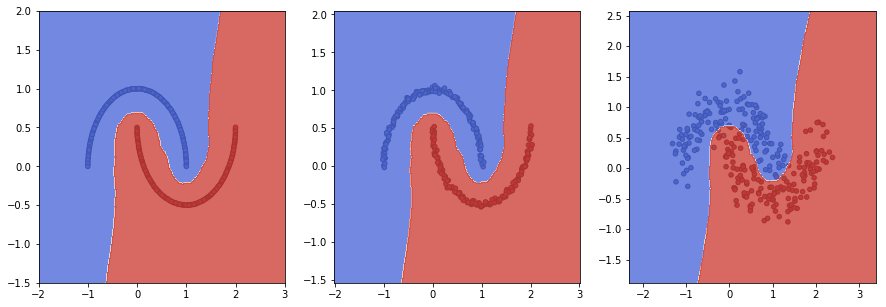

In [215]:
# self_training
def self_training_predict(train_X, new_X, alpha, neigh):
    return neigh.predict(new_X)
    
fig, ax = plt.subplots(1,3, figsize=(15, 5))

for i,moons_test in enumerate(moons_test_lis):
    test_X, test_y = moons_test[0], moons_test[1]
    X0, X1 = test_X[:, 0], test_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    labels = myneigh.predict(test_X)
    print("accuracy =", np.mean(labels.T - test_y == 0))
    ax[i].scatter(X0, X1, c=test_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plot_contours(ax=ax[i], xx=xx, yy=yy, pred_func=self_training_predict, alp=None, train_X=None, neigh=myneigh)

plt.show()